Imports

In [25]:
import pandas as pd
import requests
import os
from pathlib import Path
import os.path
import statsmodels
from statsmodels.formula.api import *
import matplotlib.pyplot as plt
from sklearn import linear_model
import ggplot
from ggplot import *

In [26]:
grades_exist = os.path.exists(os.path.join(Path().resolve(), "grades.csv"))
reviews_exist = os.path.exists(os.path.join(Path().resolve(), "reviews.csv"))

In [27]:
if reviews_exist == False:
        reviews = []
        done = False
        offset = 0

        while done == False:
                r = requests.get("https://planetterp.com/api/v1/professors", params = {"offset":offset, "reviews": "true", "limit":100},)
                if r.json() == []:
                        done = True
                else:
                        reviews.append(r.json())
                        offset = offset+100
                        #print(offset)
    
#print(len(reviews))
# expect 12200

In [28]:
if reviews_exist == False:

    df = pd.DataFrame()

    count = 0

    for i in reviews:
        for j in i:
            if j.get("reviews") != []:
                for k in j.get("reviews"):
                    if k.get("course") != None and j.get("type") == "professor":
                        df.at[count, "name"] = j.get("name")
                        df.at[count, "slug"] = j.get("slug")
                        df.at[count, "type"] = j.get("type")
                        df.at[count, "course"] = k.get("course")
                        df.at[count, "rating"] = k.get("rating")
                        df.at[count, "review"] = k.get("review")
                        df.at[count, "date"] = k.get("created")[:10]
                        count = count + 1

    df = df.sort_values(by=["name","course"])
    df

In [29]:
if grades_exist == False:

    grades = []

    professors = df["name"].drop_duplicates()

    for prof in professors:
        r = requests.get("https://planetterp.com/api/v1/grades", params = {"offset":offset, "reviews": "true", "limit":100, "professor": prof})
        grades.append(r.json())
        #print(r.json())

In [30]:
if grades_exist == False:

    grade_df = pd.DataFrame()

    count = 0

    for i in grades:
        if i != []:
            for j in i:
                grade_df.at[count, "professor"] = j.get("professor")
                grade_df.at[count, "course"] = j.get("course")
                grade_df.at[count, "semester"] = j.get("semester")
                grade_df.at[count, "section"] = j.get("section")
                grade_df.at[count, "A+"] = j.get("A+")
                grade_df.at[count, "A"] = j.get("A")
                grade_df.at[count, "A-"] = j.get("A-")
                grade_df.at[count, "B+"] = j.get("B+")
                grade_df.at[count, "B"] = j.get("B")
                grade_df.at[count, "B-"] = j.get("B-")
                grade_df.at[count, "C+"] = j.get("C+")
                grade_df.at[count, "C"] = j.get("C")
                grade_df.at[count, "C-"] = j.get("C-")
                grade_df.at[count, "D+"] = j.get("D+")
                grade_df.at[count, "D"] = j.get("D")
                grade_df.at[count, "D-"] = j.get("D-")
                grade_df.at[count, "F"] = j.get("F")
                grade_df.at[count, "W"] = j.get("W")
                grade_df.at[count, "Other"] = j.get("Other")
                count = count + 1
                print(j.get("professor"))
    
    grade_df = grade_df.sort_values(by=["professor","course"])
    grade_df

In [31]:
if reviews_exist == False:
    df.to_csv("reviews.csv", encoding='utf-8', index=False)
if grades_exist == False:
    grade_df.to_csv("grades.csv", encoding = "utf-8", index = False)

In [32]:
reviews_df = pd.read_csv("reviews.csv")
reviews_df

,name,slug,type,course,rating,review,date
0,A Anthony,anthony,professor,AMST203,1.0,"By far the worst professor I’ve ever had, and ...",2018-08-17
1,A Kruglanski,kruglanski,professor,PSYC489H,2.0,"DO NOT TAKE PSYC489H ""Motivated Social Cogniti...",2015-09-07
2,A Sharma,sharma_a,professor,ASTR300,2.0,"Very boring, it's hard to maintain your focus ...",2019-04-04
3,A Sharma,sharma_a,professor,ASTR300,1.0,You'll pass but this class will be the most bo...,2019-05-26
4,A Sharma,sharma_a,professor,ASTR300,1.0,Rather difficult course. Class is extremely bo...,2019-12-08
...,...,...,...,...,...,...,...
19180,Zsuzsa Daczo,daczo,professor,SOCY105,5.0,Amazing professor. She genuinely cares about h...,2020-09-01
19181,Zsuzsa Daczo,daczo,professor,SOCY105,3.0,I had Zsuzsa for SOCY105 online. Lectures were...,2021-01-12
19182,Zsuzsa Daczo,daczo,professor,SOCY105,5.0,"Thoughtful, kind, and really funny. She talks ...",2021-01-22
19183,Zubin Jelveh,jelveh,professor,CCJS418E,1.0,Possibly the most clueless professor regarding...,2022-04-07


In [33]:
grades_df = pd.read_csv("grades.csv")
grades_df

,professor,course,semester,section,A+,A,A-,B+,B,B-,C+,C,C-,D+,D,D-,F,W,Other
0,A Anthony,AMST202,201608,0101,1.0,2.0,1.0,2.0,5.0,1.0,2.0,3.0,5.0,0.0,0.0,0.0,2.0,4.0,0.0
1,A Anthony,AMST202,201701,0101,0.0,1.0,4.0,3.0,3.0,7.0,3.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,A Anthony,AMST203,201708,FCH1,0.0,2.0,1.0,1.0,6.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
3,A Anthony,AMST203,201708,FCH2,0.0,0.0,1.0,4.0,3.0,0.0,0.0,4.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0
4,A Anthony,AMST203,201801,0201,1.0,3.0,1.0,2.0,4.0,0.0,2.0,3.0,1.0,0.0,0.0,2.0,2.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87241,Zubin Jelveh,CCJS418E,202201,0101,22.0,4.0,3.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0
87242,Zubin Jelveh,CCJS418E,202208,101,1.0,1.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0
87243,Zubin Jelveh,INST414,202101,0103,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
87244,Zubin Jelveh,INST414,202108,0103,36.0,1.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0


In [34]:
average_reviews_df = pd.DataFrame()
classes = {}
count = 0
curr_prof = reviews_df.at[0, "name"]
for index, row in reviews_df.iterrows():
    if reviews_df.at[index, "name"] == curr_prof:
        if reviews_df.at[index, "course"] in classes:
            classes[reviews_df.at[index, "course"]] = [classes.get(reviews_df.at[index, "course"])[0] + reviews_df.at[index, "rating"], 
                                                       classes.get(reviews_df.at[index, "course"])[1] + 1]
        else:
            classes[reviews_df.at[index, "course"]] = [reviews_df.at[index, "rating"],1]
    else:
        for i in classes.keys():
            average_reviews_df.at[count, "name"] = curr_prof
            average_reviews_df.at[count, "course"] = i
            average_reviews_df.at[count, "average_rating"] = classes.get(i)[0]/classes.get(i)[1]
            average_reviews_df.at[count, "num_ratings"] = classes.get(i)[1]
            count = count + 1
        classes = {}
        curr_prof = reviews_df.at[index, "name"]

average_reviews_df


,name,course,average_rating,num_ratings
0,A Anthony,AMST203,1.000000,1.0
1,A Sharma,ASTR300,1.750000,4.0
2,A.U. Shankar,CMSC216,2.222222,18.0
3,A.U. Shankar,CMSC412,3.200000,5.0
4,Aaron Bartlett,ENGL265,2.000000,3.0
...,...,...,...,...
4169,Zita Nunes,AASP298L,3.000000,1.0
4170,Zita Nunes,ENGL234,4.000000,2.0
4171,Zoe Copeman,ARTH201,3.600000,5.0
4172,Zohreh Davoudi,PHYS411,1.666667,3.0


In [35]:
average_grades_df = pd.DataFrame()
classes = {}
gpa = {"A+":4.0, "A":4.0, "A-":3.7,"B+":3.3, "B":3.0, "B-":2.7, "C+":2.3, "C":2.0, "C-":1.7, "D+":1.3, "D":1.0, "D-":0.7, "F":0.0}
count = 0
curr_prof = grades_df.at[0, "professor"]
for index, row in grades_df.iterrows():
    curr_gpa = [0, 0]
    for i in gpa.keys():
        curr_gpa[0] = curr_gpa[0] + gpa.get(i)*grades_df.at[index, i]
        curr_gpa[1] = curr_gpa[1] + grades_df.at[index, i]
    if grades_df.at[index, "professor"] == curr_prof:
        if grades_df.at[index, "course"] in classes:
            classes[grades_df.at[index, "course"]] = [classes.get(grades_df.at[index, "course"])[0] + curr_gpa[0], 
                                                      classes.get(grades_df.at[index, "course"])[1] + curr_gpa[1]]
        else:
            classes[grades_df.at[index, "course"]] = curr_gpa
    else:
        for i in classes.keys():
            if classes.get(i)[1] != 0:
                average_grades_df.at[count, "name"] = curr_prof
                average_grades_df.at[count, "course"] = i
                average_grades_df.at[count, "average_gpa"] = (classes.get(i)[0])/(classes.get(i)[1])
                average_grades_df.at[count, "num_students"] = classes.get(i)[1]
                count = count + 1
        classes = {}
        curr_prof = grades_df.at[index, "professor"]

average_grades_df

,name,course,average_gpa,num_students
0,A Anthony,AMST202,2.693617,47.0
1,A Anthony,AMST203,2.914130,92.0
2,A Kruglanski,PSYC489H,3.550000,8.0
3,A Kruglanski,PSYC489T,3.561702,94.0
4,A Kruglanski,PSYC604,3.544828,29.0
...,...,...,...,...
14475,Zohreh Davoudi,PHYS604,3.503636,55.0
14476,Zohreh Davoudi,PHYS624,3.565517,29.0
14477,Zsuzsa Daczo,SOCY105,3.783108,592.0
14478,Zsuzsa Daczo,SOCY227,3.698433,319.0


In [36]:
#print(average_grades_df.to_string())

In [37]:
both_averages_df = pd.merge(
    average_reviews_df,
    average_grades_df,
    how = "inner",
    on = ["name", "course"]
)

both_averages_df

,name,course,average_rating,num_ratings,average_gpa,num_students
0,A Anthony,AMST203,1.000000,1.0,2.914130,92.0
1,A Sharma,ASTR300,1.750000,4.0,2.964706,221.0
2,A.U. Shankar,CMSC216,2.222222,18.0,2.357948,692.0
3,A.U. Shankar,CMSC412,3.200000,5.0,2.809319,279.0
4,Aaron Bartlett,ENGL265,2.000000,3.0,3.296552,29.0
...,...,...,...,...,...,...
3495,Zhi Xiang Lin,HACS200,2.500000,2.0,3.872727,33.0
3496,Zhongchi Liu,BSCI410,4.714286,7.0,3.433214,557.0
3497,Zita Nunes,ENGL234,4.000000,2.0,2.562766,94.0
3498,Zohreh Davoudi,PHYS411,1.666667,3.0,2.772093,43.0


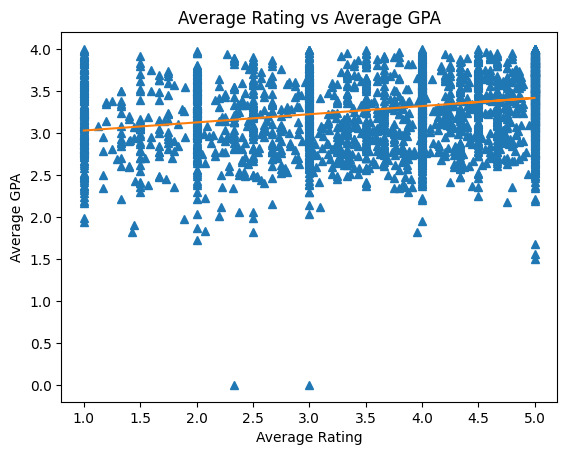

In [38]:
x = both_averages_df["average_rating"]
y = both_averages_df["average_gpa"]
reg = linear_model.LinearRegression()
x_train = [[x] for x in both_averages_df["average_rating"].values]
y_train = [[y] for y in both_averages_df["average_gpa"].values]
regfit = reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.plot(x, y, "^")
plt.plot(x_train,y_pred)
plt.title("Average Rating vs Average GPA")
plt.ylabel("Average GPA")
plt.xlabel("Average Rating")
plt.show()

In [39]:
# getting rid of professor/class combinations with less than 5 reviews

five_or_more_df = pd.DataFrame()
count = 0

for index, row in both_averages_df.iterrows():
    if both_averages_df.at[index, "num_ratings"] >= 5:
        five_or_more_df.at[count, "name"] = both_averages_df.at[index, "name"]
        five_or_more_df.at[count, "course"] = both_averages_df.at[index, "course"]
        five_or_more_df.at[count, "average_rating"] = both_averages_df.at[index, "average_rating"]
        five_or_more_df.at[count, "num_ratings"] = both_averages_df.at[index, "num_ratings"]
        five_or_more_df.at[count, "average_gpa"] = both_averages_df.at[index, "average_gpa"]
        five_or_more_df.at[count, "num_students"] = both_averages_df.at[index, "num_students"]
        count = count + 1

five_or_more_df

,name,course,average_rating,num_ratings,average_gpa,num_students
0,A.U. Shankar,CMSC216,2.222222,18.0,2.357948,692.0
1,A.U. Shankar,CMSC412,3.200000,5.0,2.809319,279.0
2,Aaron Finkle,ECON306,2.500000,8.0,2.706983,2678.0
3,Aaron Swanlek,COMM107,5.000000,7.0,3.938579,394.0
4,Abigail Nicolas,PSYC221,5.000000,8.0,3.557846,325.0
...,...,...,...,...,...,...
823,Zachary Dorner,HNUH258X,5.000000,9.0,3.826582,79.0
824,Zachary Greenberg,MATH140,2.600000,5.0,2.402976,168.0
825,Zeinab Karake,BMGT301,3.800000,10.0,3.222812,4090.0
826,Zeinab Karake,BMGT301F,2.363636,11.0,3.345942,1454.0


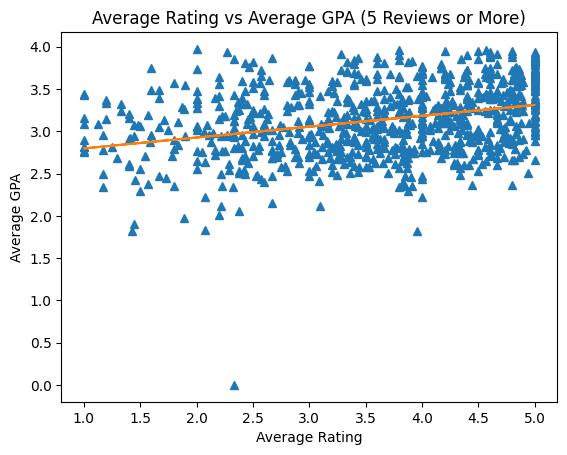

In [40]:
x = five_or_more_df["average_rating"]
y = five_or_more_df["average_gpa"]
reg = linear_model.LinearRegression()
x_train = [[x] for x in five_or_more_df["average_rating"].values]
y_train = [[y] for y in five_or_more_df["average_gpa"].values]
regfit = reg.fit(x_train, y_train)
y_pred = reg.predict(x_train)
plt.plot(x, y, "^")
plt.plot(x_train,y_pred)
plt.title("Average Rating vs Average GPA (5 Reviews or More)")
plt.ylabel("Average GPA")
plt.xlabel("Average Rating")
plt.show()

In [41]:
for index, row in five_or_more_df.iterrows():
    five_or_more_df.at[index, "department"] = five_or_more_df.at[index, "course"][:4]

five_or_more_df

,name,course,average_rating,num_ratings,average_gpa,num_students,department
0,A.U. Shankar,CMSC216,2.222222,18.0,2.357948,692.0,CMSC
1,A.U. Shankar,CMSC412,3.200000,5.0,2.809319,279.0,CMSC
2,Aaron Finkle,ECON306,2.500000,8.0,2.706983,2678.0,ECON
3,Aaron Swanlek,COMM107,5.000000,7.0,3.938579,394.0,COMM
4,Abigail Nicolas,PSYC221,5.000000,8.0,3.557846,325.0,PSYC
...,...,...,...,...,...,...,...
823,Zachary Dorner,HNUH258X,5.000000,9.0,3.826582,79.0,HNUH
824,Zachary Greenberg,MATH140,2.600000,5.0,2.402976,168.0,MATH
825,Zeinab Karake,BMGT301,3.800000,10.0,3.222812,4090.0,BMGT
826,Zeinab Karake,BMGT301F,2.363636,11.0,3.345942,1454.0,BMGT


In [42]:
dep_gpas = {}
dep_gpas_df = pd.DataFrame()

for index, row in five_or_more_df.iterrows():
    if five_or_more_df.at[index, "department"] in dep_gpas:
        dep_gpas[five_or_more_df.at[index, "department"]] = [dep_gpas.get(five_or_more_df.at[index, "department"])[0] + 
                                                             five_or_more_df.at[index, "average_gpa"]*five_or_more_df.at[index, "num_students"],
                                                             dep_gpas.get(five_or_more_df.at[index, "department"])[1] +five_or_more_df.at[index, "num_students"]]
    else:
        dep_gpas[five_or_more_df.at[index, "department"]] = [five_or_more_df.at[index, "average_gpa"]*five_or_more_df.at[index, "num_students"],
                                                             five_or_more_df.at[index, "num_students"]]

count = 0
for i in dep_gpas:
    dep_gpas_df.at[count, "department"] = i
    dep_gpas_df.at[count, "average_gpa"] = dep_gpas.get(i)[0]/dep_gpas.get(i)[1]
    dep_gpas_df.at[count, "total_students"] = dep_gpas.get(i)[1]
    count = count + 1

dep_gpas_df


,department,average_gpa,total_students
0,CMSC,2.857328,67391.0
1,ECON,2.807326,45127.0
2,COMM,3.145670,9111.0
3,PSYC,3.145771,28295.0
4,BIOE,3.283020,2391.0
...,...,...,...
66,GERM,3.463801,221.0
67,MLAW,3.751643,213.0
68,CPSN,3.821538,65.0
69,GEOL,3.203854,4359.0


In [43]:
for index, row in average_grades_df.iterrows():
    average_grades_df.at[index, "department"] = average_grades_df.at[index, "course"][:4]

average_grades_df

,name,course,average_gpa,num_students,department
0,A Anthony,AMST202,2.693617,47.0,AMST
1,A Anthony,AMST203,2.914130,92.0,AMST
2,A Kruglanski,PSYC489H,3.550000,8.0,PSYC
3,A Kruglanski,PSYC489T,3.561702,94.0,PSYC
4,A Kruglanski,PSYC604,3.544828,29.0,PSYC
...,...,...,...,...,...
14475,Zohreh Davoudi,PHYS604,3.503636,55.0,PHYS
14476,Zohreh Davoudi,PHYS624,3.565517,29.0,PHYS
14477,Zsuzsa Daczo,SOCY105,3.783108,592.0,SOCY
14478,Zsuzsa Daczo,SOCY227,3.698433,319.0,SOCY


In [49]:
departments = five_or_more_df["department"].drop_duplicates()

print(len(departments))

71


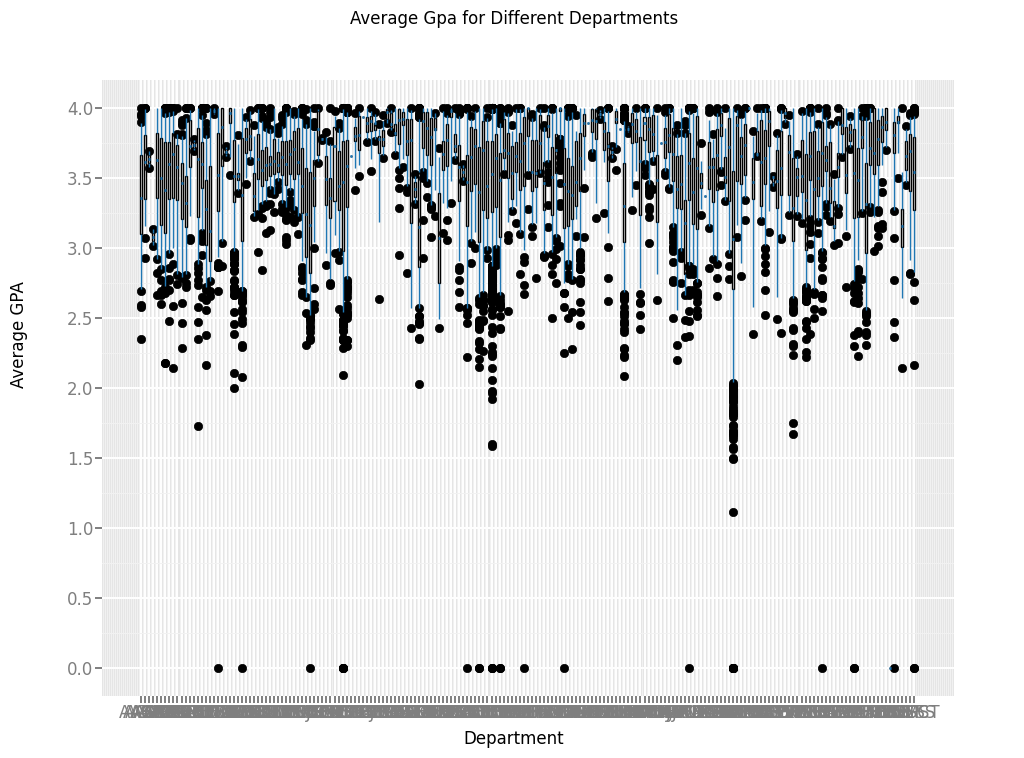

<ggplot: (102607582253)>

In [44]:
ggplot(aes(x="department", y="average_gpa"), data=average_grades_df) + geom_boxplot() +\
    labs(title="Average Gpa for Different Departments",
         x = "Department",
         y = "Average GPA")

Too many courses, narrow down to the 10 with the most data

In [55]:
dep_gpas_df = dep_gpas_df.sort_values(by = "total_students", ascending = False, ignore_index = True)

dep_gpas_df

,department,average_gpa,total_students
0,BMGT,3.132354,93715.0
1,CHEM,2.823005,71498.0
2,CMSC,2.857328,67391.0
3,BSCI,3.073723,64753.0
4,MATH,2.827608,63736.0
...,...,...,...
66,HACS,3.597222,180.0
67,JAPN,2.815753,146.0
68,HLSC,3.635000,100.0
69,CPSN,3.821538,65.0


In [56]:
most_students_dep = []

for i in range(10):
    most_students_dep.append(dep_gpas_df.at[i, "department"])

print(most_students_dep)

['BMGT', 'CHEM', 'CMSC', 'BSCI', 'MATH', 'ENES', 'ECON', 'PSYC', 'ENGL', 'CCJS']


In [57]:
popular_departments_df = pd.DataFrame()

count = 0

for index, row in five_or_more_df.iterrows():
    if five_or_more_df.at[index, "department"] in most_students_dep:
        popular_departments_df.at[count, "name"] = five_or_more_df.at[index, "name"]
        popular_departments_df.at[count, "course"] = five_or_more_df.at[index, "course"]
        popular_departments_df.at[count, "average_rating"] = five_or_more_df.at[index, "average_rating"]
        popular_departments_df.at[count, "num_ratings"] = five_or_more_df.at[index, "num_ratings"]
        popular_departments_df.at[count, "average_gpa"] = five_or_more_df.at[index, "average_gpa"]
        popular_departments_df.at[count, "num_students"] = five_or_more_df.at[index, "num_students"]
        popular_departments_df.at[count, "department"] = five_or_more_df.at[index, "department"]
        count = count + 1

popular_departments_df

,name,course,average_rating,num_ratings,average_gpa,num_students,department
0,A.U. Shankar,CMSC216,2.222222,18.0,2.357948,692.0,CMSC
1,A.U. Shankar,CMSC412,3.200000,5.0,2.809319,279.0,CMSC
2,Aaron Finkle,ECON306,2.500000,8.0,2.706983,2678.0,ECON
3,Abigail Nicolas,PSYC221,5.000000,8.0,3.557846,325.0,PSYC
4,Adam Porter,CMSC436,2.000000,9.0,3.329695,1081.0,CMSC
...,...,...,...,...,...,...,...
496,Yijing Wu,MATH141,3.000000,5.0,2.730822,146.0,MATH
497,Zachary Greenberg,MATH140,2.600000,5.0,2.402976,168.0,MATH
498,Zeinab Karake,BMGT301,3.800000,10.0,3.222812,4090.0,BMGT
499,Zeinab Karake,BMGT301F,2.363636,11.0,3.345942,1454.0,BMGT


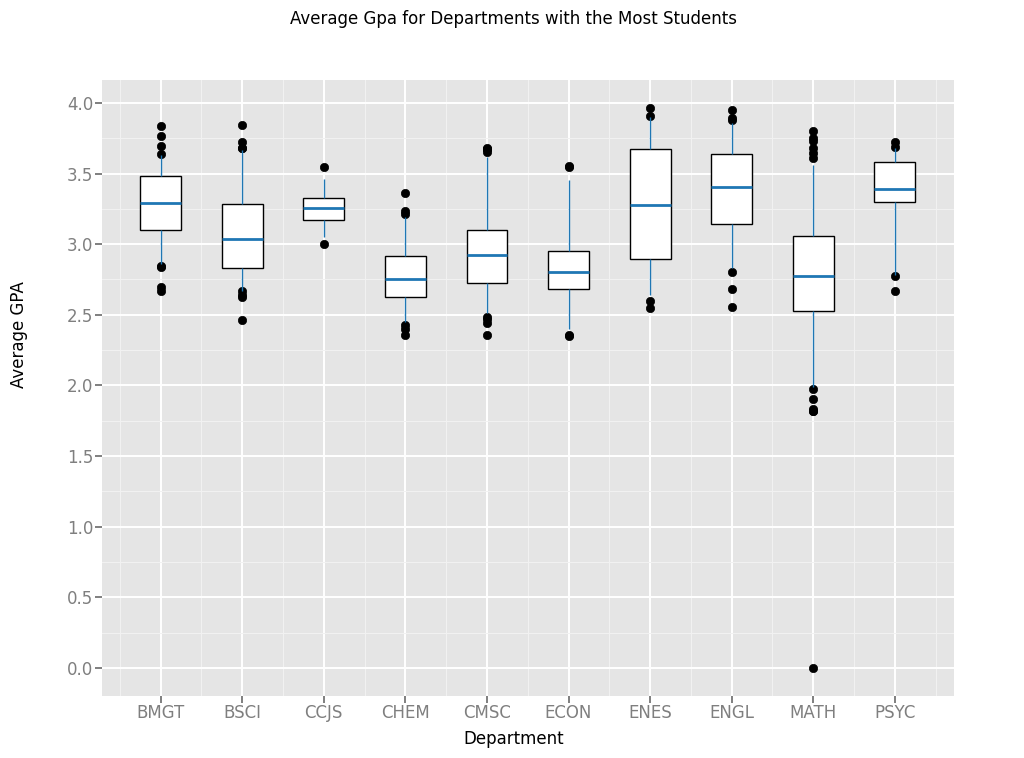

<ggplot: (102613195189)>

In [60]:
ggplot(aes(x="department", y="average_gpa"), data=popular_departments_df) + geom_boxplot() +\
    labs(title="Average Gpa for Departments with the Most Students",
         x = "Department",
         y = "Average GPA")

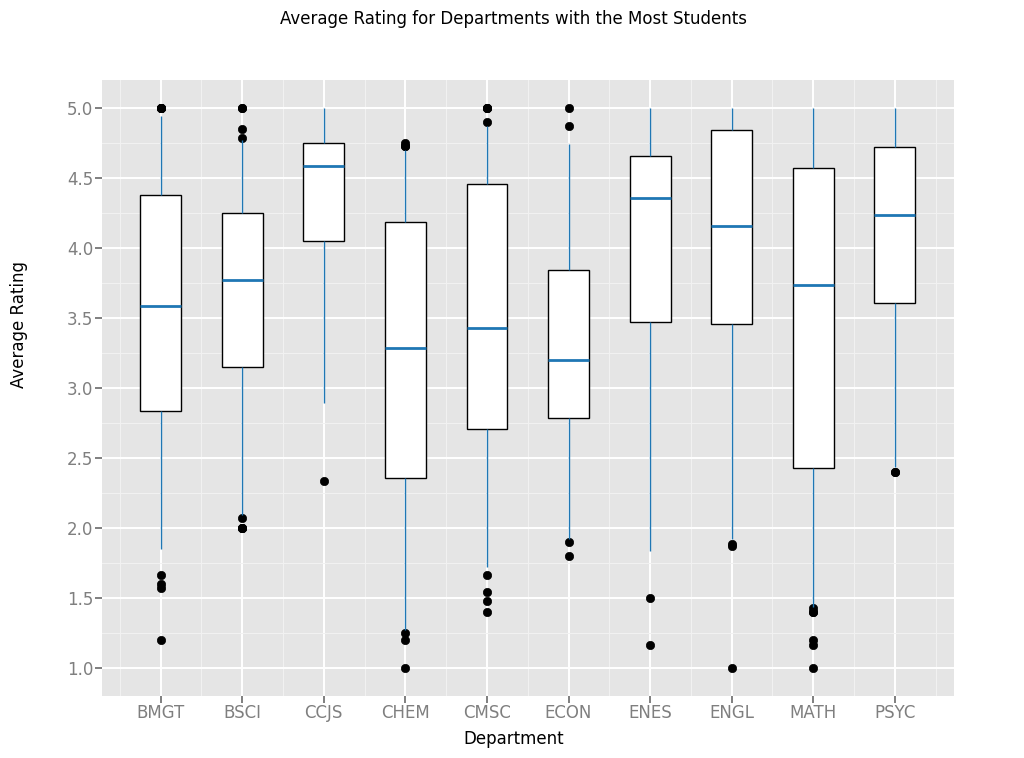

<ggplot: (102624587029)>

In [63]:
ggplot(aes(x="department", y="average_rating"), data=popular_departments_df) + geom_boxplot() +\
    labs(title="Average Rating for Departments with the Most Students",
         x = "Department",
         y = "Average Rating")

In [75]:
multi_prof = {}
curr_prof = None
classes = [[]]
multi = False
for index, row in five_or_more_df.iterrows():
    classes.append([five_or_more_df.at[index, "course"],
                    five_or_more_df.at[index, "average_rating"],
                    five_or_more_df.at[index, "num_ratings"],
                    five_or_more_df.at[index, "average_gpa"],
                    five_or_more_df.at[index, "num_students"],
                    five_or_more_df.at[index, "department"]])
    if five_or_more_df.at[index, "name"] == curr_prof:
        multi = True
    else:
        if multi == True:
            multi_prof[curr_prof] = classes
            multi = False
        classes = []
        curr_prof = five_or_more_df.at[index, "name"]

print(len(multi_prof.keys()))

137


In [76]:
multi_prof_df = pd.DataFrame()

count = 0
for i in multi_prof.keys():
    multi_prof_df.at[count, "name"] = i
    multi_prof_df.at[count, "num_classes"] = len(multi_prof.get(i))
    count = count + 1

multi_prof_df

,name,num_classes
0,A.U. Shankar,2.0
1,Agisilaos Iliadis,2.0
2,Alice Mignerey,2.0
3,Alka Gandhi,2.0
4,Allan Yashinski,3.0
...,...,...
132,William Higgins,3.0
133,William McClenahan,3.0
134,Wiseley Wong,3.0
135,Yavuz Oruc,2.0


In [77]:
multi_prof_df = multi_prof_df.sort_values(by = "num_classes", ascending = False, ignore_index = True)

multi_prof_df

,name,num_classes
0,Bonnie Dixon,6.0
1,Timothy Pilachowski,6.0
2,Mestiyage Gunatilleka,5.0
3,Justin Wyss-Gallifent,5.0
4,Nelson Padua-Perez,5.0
...,...,...
132,Jonathan Fernandes,2.0
133,Jonathan England,2.0
134,John Ondov,2.0
135,John Bono,2.0


In [73]:
multi_prof_df["num_classes"].value_counts()

2.0    93
3.0    30
4.0     9
5.0     3
6.0     2
Name: num_classes, dtype: int64

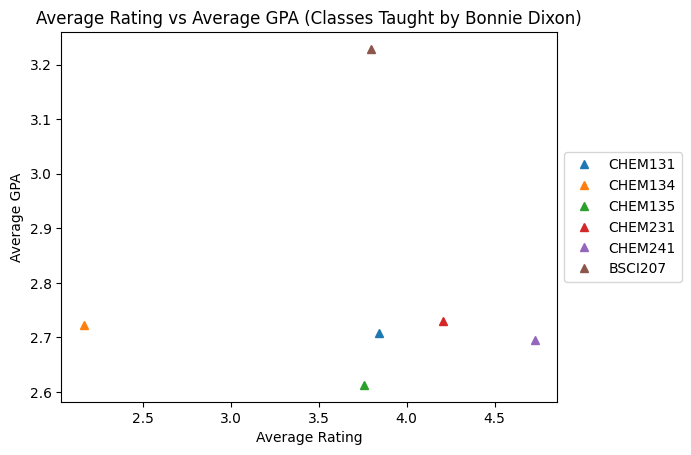

In [93]:
courses = []
ratings = []
gpas = []

for i in multi_prof.get("Bonnie Dixon"):
    courses.append(i[0])
    ratings.append(i[1])
    gpas.append(i[3])

for i in range(6):
    plt.plot(ratings[i], gpas[i], "^", label = courses[i])

plt.title("Average Rating vs Average GPA (Classes Taught by Bonnie Dixon)")
plt.ylabel("Average GPA")
plt.xlabel("Average Rating")
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()

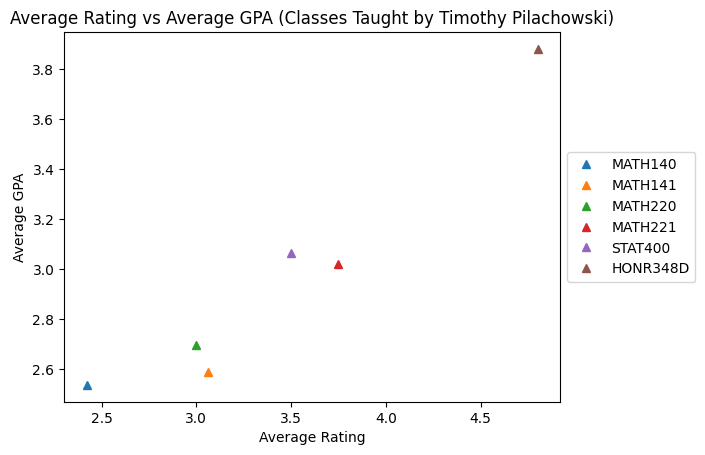

In [95]:
courses = []
ratings = []
gpas = []

for i in multi_prof.get("Timothy Pilachowski"):
    courses.append(i[0])
    ratings.append(i[1])
    gpas.append(i[3])

for i in range(6):
    plt.plot(ratings[i], gpas[i], "^", label = courses[i])

plt.title("Average Rating vs Average GPA (Classes Taught by Timothy Pilachowski)")
plt.ylabel("Average GPA")
plt.xlabel("Average Rating")
plt.legend(loc = "center left", bbox_to_anchor=(1, 0.5))
plt.show()

In [109]:
most_classes_profs = []

for i in range(14):
    most_classes_profs.append(multi_prof_df.at[i, "name"])

print(most_classes_profs)

['Bonnie Dixon', 'Timothy Pilachowski', 'Mestiyage Gunatilleka', 'Justin Wyss-Gallifent', 'Nelson Padua-Perez', 'Michael Galczynski', 'Ilchul Yoon', 'Christiana Guest', 'Manoussos Grillakis', 'Roohollah Ebrahimian', 'Jeff Miller', 'David Hamilton', 'Jose Calderon', 'Fawzi Emad']


In [110]:
most_classes_profs_df = pd.DataFrame()
count = 0

for index, row in five_or_more_df.iterrows():
    if five_or_more_df.at[index, "name"] in most_classes_profs:
        most_classes_profs_df.at[count, "name"] = five_or_more_df.at[index, "name"]
        most_classes_profs_df.at[count, "course"] = five_or_more_df.at[index, "course"]
        most_classes_profs_df.at[count, "average_rating"] = five_or_more_df.at[index, "average_rating"]
        most_classes_profs_df.at[count, "num_ratings"] = five_or_more_df.at[index, "num_ratings"]
        most_classes_profs_df.at[count, "average_gpa"] = five_or_more_df.at[index, "average_gpa"]
        most_classes_profs_df.at[count, "num_students"] = five_or_more_df.at[index, "num_students"]
        most_classes_profs_df.at[count, "department"] = five_or_more_df.at[index, "department"]
        count = count + 1

most_classes_profs_df

,name,course,average_rating,num_ratings,average_gpa,num_students,department
0,Bonnie Dixon,BCHM463,2.666667,12.0,2.769094,1291.0,BCHM
1,Bonnie Dixon,CHEM131,3.842105,19.0,2.707407,243.0,CHEM
2,Bonnie Dixon,CHEM134,2.166667,6.0,2.723111,225.0,CHEM
3,Bonnie Dixon,CHEM135,3.758621,29.0,2.612654,893.0,CHEM
4,Bonnie Dixon,CHEM231,4.205882,68.0,2.730612,2829.0,CHEM
...,...,...,...,...,...,...,...
58,Timothy Pilachowski,MATH140,2.421053,19.0,2.537509,1437.0,MATH
59,Timothy Pilachowski,MATH141,3.062500,16.0,2.590874,767.0,MATH
60,Timothy Pilachowski,MATH220,3.000000,18.0,2.696318,1168.0,MATH
61,Timothy Pilachowski,MATH221,3.750000,8.0,3.021374,131.0,MATH


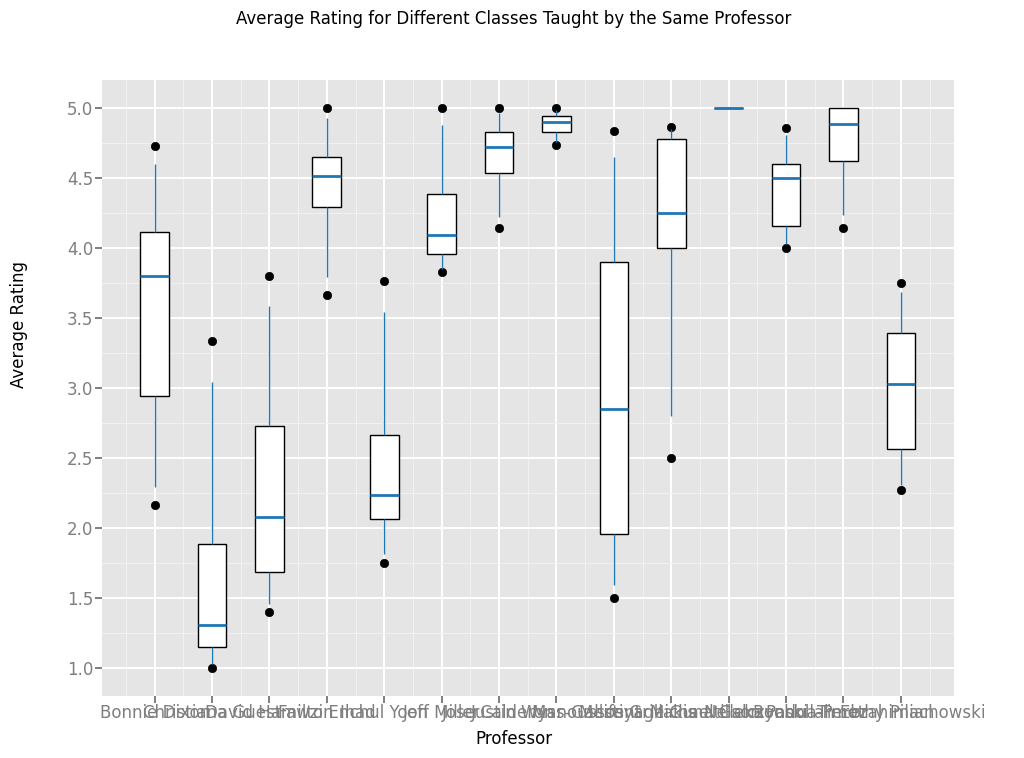

<ggplot: (102628314733)>

In [112]:
ggplot(aes(x="name", y="average_rating"), data=most_classes_profs_df) + geom_boxplot() +\
    labs(title="Average Rating for Different Classes Taught by the Same Professor",
         x = "Professor",
         y = "Average Rating")

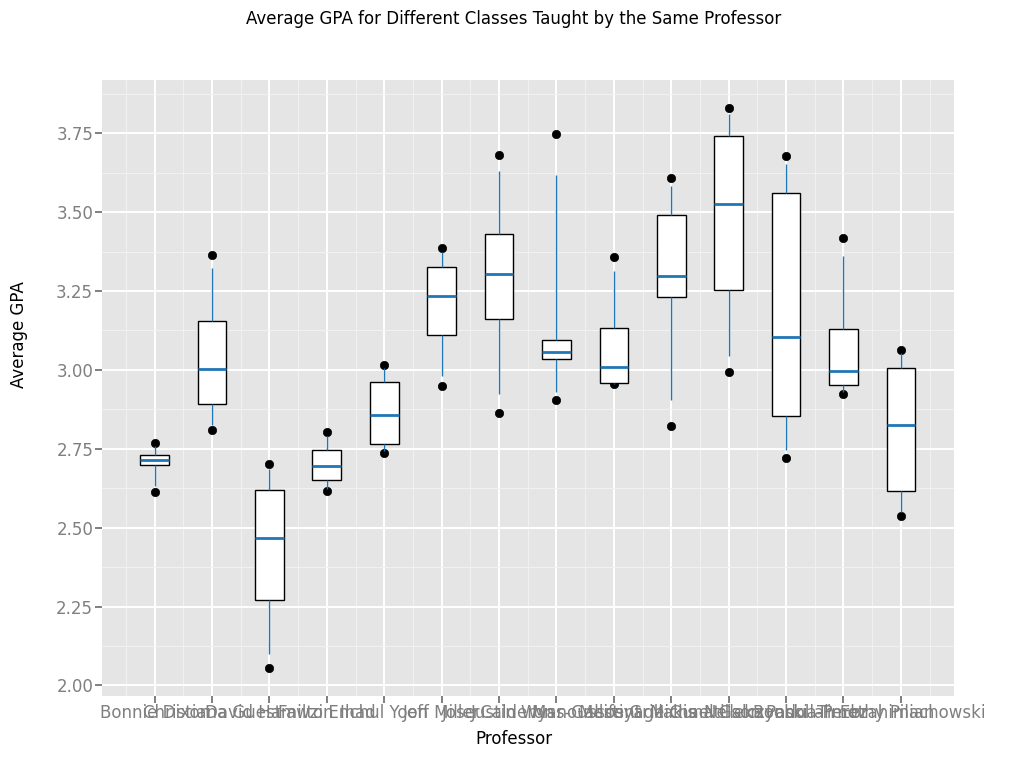

<ggplot: (102628084537)>

In [113]:
ggplot(aes(x="name", y="average_gpa"), data=most_classes_profs_df) + geom_boxplot() +\
    labs(title="Average GPA for Different Classes Taught by the Same Professor",
         x = "Professor",
         y = "Average GPA")